<a href="https://colab.research.google.com/github/gantapriyanka1325/DeepLearningLab/blob/main/program9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9) Design and implement a CNN model to classify multi category JPG images with tensor flow / keras and check accuracy. Predict labels for new images.



In [5]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
#Optional GPU Settings
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [7]:
with open("/content/data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

In [8]:
#Extract Images and Labels

X = batch[b'data']
y = np.array(batch[b'labels'])


In [9]:
#2️ Reshape & Normalize

X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0


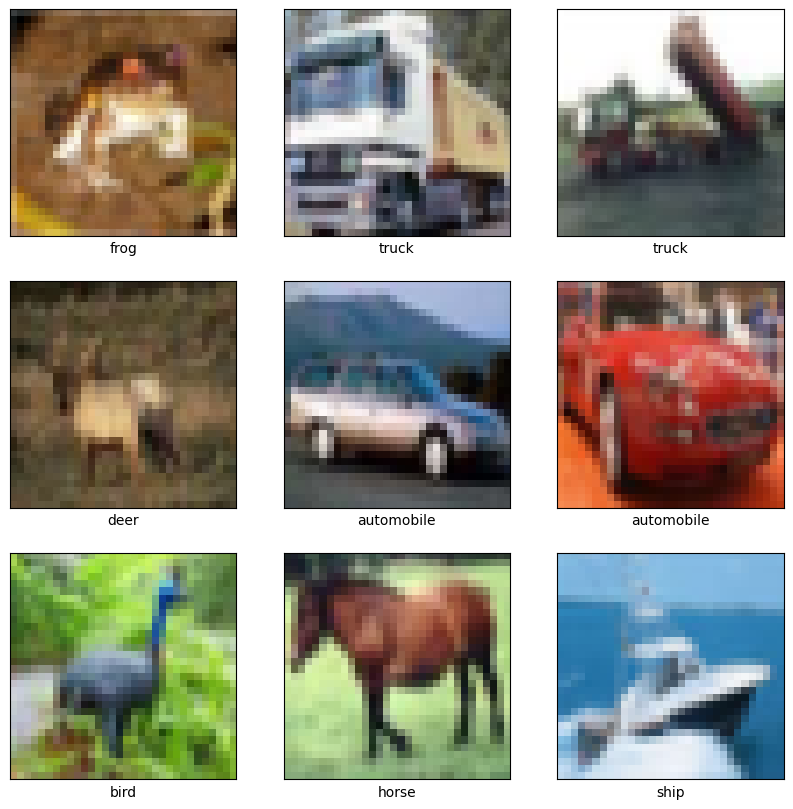

In [20]:
X_images=X.reshape(-1,3,32,32).transpose(0,2,3,1)
label_names=np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_images[i])
  plt.xlabel(label_names[y[i]])
plt.show()


In [21]:
#3️ One-Hot Encode Labels

num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes = num_classes)


In [22]:
# Train/Test Split

X_train, y_train = X_images[:4000], y_cat[:4000]
X_test, y_test = X_images[4000:5000], y_cat[4000:5000]



In [23]:
#5️ Define CNN Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
#6️ Compile the Model

model.compile(optimizer ='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [26]:
#7️ Train the Model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=1)



Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.4371 - loss: 1.5943 - val_accuracy: 0.3970 - val_loss: 1.7136
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.5108 - loss: 1.3470 - val_accuracy: 0.4390 - val_loss: 1.6373
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6027 - loss: 1.1584 - val_accuracy: 0.4350 - val_loss: 1.6979
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6543 - loss: 0.9827 - val_accuracy: 0.4420 - val_loss: 1.7572
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.7352 - loss: 0.8061 - val_accuracy: 0.4500 - val_loss: 1.8646


In [27]:
#8️ Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\n Training Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")



 Training Accuracy: 0.8340, Loss: 0.5369
 Testing Accuracy: 0.4500, Loss: 1.8646


In [28]:
#9️ Confusion Matrix & Classification Report

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)



32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


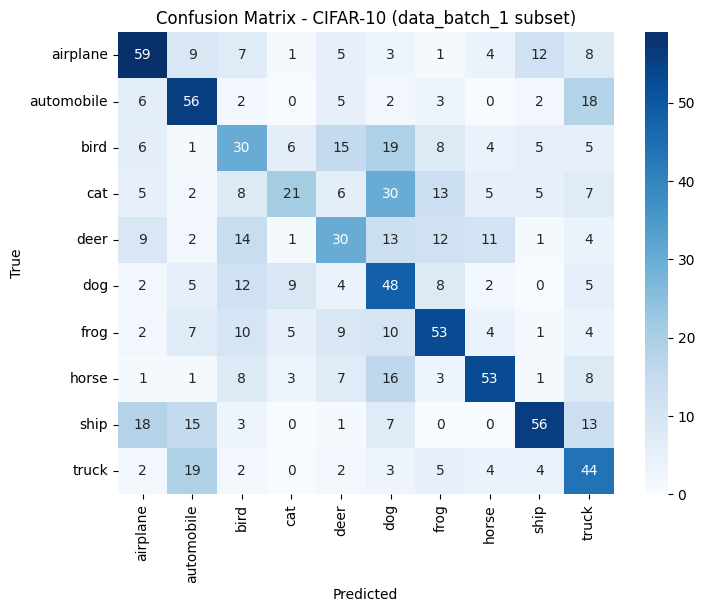

In [29]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix - CIFAR-10 (data_batch_1 subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


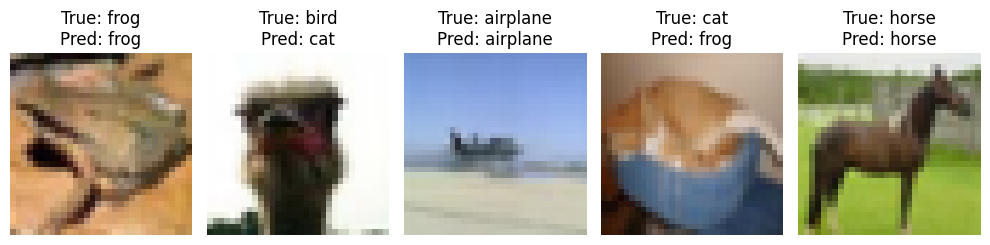

In [32]:
#Predict New Images

num_samples = 5
idx = np.random.randint(0, len(X_test), num_samples)
sample_images = X_test[idx]
sample_labels = y_true[idx]
sample_preds = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {label_names[sample_labels[i]]}\nPred: {label_names[sample_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

